In [1]:
import numpy as np
import matplotlib.pyplot as plt



import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Dropout
from tensorflow.keras.optimizers import SGD
tf.__version__



'2.4.0'

In [2]:
test_data =[]
training_data =[]
test_class = []
training_class =[]
cnt  = 0;
for n in range(0,2000):
    rand_lines_v = []
    rand_lines_h =[]
    while len(rand_lines_v)!=10:
        new_i = np.random.randint(0,50)
        if new_i not in rand_lines_v:
            rand_lines_v.append(new_i)
    while len(rand_lines_h)!=10:
        new_i = np.random.randint(0,50)
        if new_i not in rand_lines_h:
            rand_lines_h.append(new_i)  
    grayscale_img = np.zeros((50,50))
    for i in range(0,50):
        grayscale_img[i]= np.random.uniform(0,1,50);
    clas = np.random.randint(0,2)
    if bool(clas):
        cnt = cnt+1
        for i in range(0,10):
            rand_start_v=np.random.randint(0,40);
            for j in range(0,10):
                grayscale_img[rand_lines_v[i],j+rand_start_v]=0
    else:
        for i in range(0,10):
            rand_start_h=np.random.randint(0,40);
            for j in range(0,10):
                grayscale_img[j+rand_start_h,rand_lines_h[i]]=0
    if n<1000:
        training_data.append(grayscale_img)
        training_class.append([clas,int(not clas)])
        #plt.pcolor(range(0,50),range(0,50),grayscale_img,cmap='gray')
        #plt.show()
        #print(clas)
    else:
        test_data.append(grayscale_img)
        test_class.append([clas,int(not clas)])
training_data = np.reshape(training_data,(1000,2500))
test_data = np.reshape(test_data,(1000,2500))
test_class = np.array(test_class)
training_class = np.array(training_class)




In [3]:
model = Sequential()
model.add(keras.layers.Reshape(target_shape=(50, 50, 1)))
model.add(Convolution2D(2, kernel_size=(5, 5),activation='relu',input_shape=(50,50,1),name="conv"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model

In [4]:
np.shape(test_class)

(1000, 2)

In [5]:

# Optimierer
eta = 0.03                  # learning rate
wdecay = 0.1/np.shape(training_data)[0]    # weight decay
sgd = SGD(lr=eta, decay=wdecay)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(training_data,training_class,
          batch_size=10,
          epochs=15,
          verbose=1,
          validation_data=(test_data,test_class))


Epoch 1/15
100/100 [==============================] - 2s 19ms/step - loss: 0.7712 - accuracy: 0.4898 - val_loss: 0.6947 - val_accuracy: 0.5050
Epoch 2/15
100/100 [==============================] - 1s 8ms/step - loss: 0.6901 - accuracy: 0.5362 - val_loss: 0.6934 - val_accuracy: 0.4960
Epoch 3/15
100/100 [==============================] - 1s 9ms/step - loss: 0.6897 - accuracy: 0.5256 - val_loss: 0.6929 - val_accuracy: 0.4910
Epoch 4/15
100/100 [==============================] - 1s 8ms/step - loss: 0.6860 - accuracy: 0.5359 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 5/15
100/100 [==============================] - 1s 8ms/step - loss: 0.6787 - accuracy: 0.5579 - val_loss: 0.6754 - val_accuracy: 0.5500
Epoch 6/15
100/100 [==============================] - 1s 8ms/step - loss: 0.6572 - accuracy: 0.6019 - val_loss: 0.6545 - val_accuracy: 0.5040
Epoch 7/15
100/100 [==============================] - 1s 8ms/step - loss: 0.5699 - accuracy: 0.7727 - val_loss: 0.5227 - val_accuracy: 0.7610
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


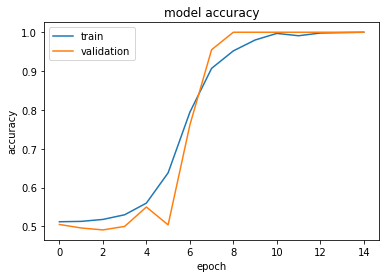

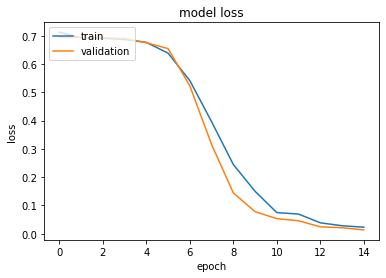

In [6]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [7]:
w = model.get_weights()
print(np.shape(w[0]))
print(np.shape(w[1]))
print(np.shape(w[2]))
print(np.shape(w[3]))
#plt.pcolor(range(0,5),range(0,5),grayscale_img,cmap='gray')
w[1]


(5, 5, 1, 2)
(2,)
(1058, 2)
(2,)


array([0.08806234, 0.14147401], dtype=float32)

In [8]:
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(2,1, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(2):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

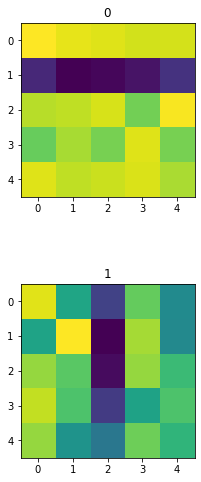

In [9]:
plot_conv_weights(model,"conv")